# Importing important Libraries

In [1]:
# Libraries to handle dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# library to ignore warnings if occur
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Reading Datasets

In [2]:
# Train Dataset
train = pd.read_csv('../input/santander-customer-satisfaction/train.csv', index_col=['ID'])         # Making ID as an index column

# Test Dataset
test = pd.read_csv("../input/santander-customer-satisfaction/test.csv", index_col=0)                # ID as index column

# Sample Dataset
samp_sub = pd.read_csv('../input/santander-customer-satisfaction/sample_submission.csv')

In [3]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

In [4]:
train['TARGET'].unique()      # Checking the number of unique values present in the response column

array([0, 1])

In [5]:
train.shape                   # Checking rows and columns

(76020, 370)

In [6]:
train.isna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Columns: 370 entries, var3 to TARGET
dtypes: bool(370)
memory usage: 27.4 MB


In [7]:
train.dtypes                   # Datatypes of each column

var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0                         int64
ind_var5        

In [8]:
#train.select_dtypes(exclude='object')     # Excluding the columns having object datatype

In [9]:
train.shape

(76020, 370)

In [10]:
train.isna().sum()            # Checking NULL values

var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0                       0
ind_var8            

# Splitting features and response columns

In [11]:
X_train = train.iloc[:,0:-1]
Y_train = train.iloc[:,-1]

# Normalization DataSet

In [12]:
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X_train)

testscaled = scaler.transform(test)

In [13]:
testscaled

array([[ 3.90744048e-02, -9.36112639e-02, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -4.19918334e-01],
       [ 3.90744048e-02,  1.37934525e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -3.92794017e-01],
       [ 3.90744048e-02, -7.88248631e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -3.84542610e-01],
       ...,
       [ 3.90744048e-02, -7.11066701e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02,  2.74077683e-01],
       [ 3.90744048e-02,  5.23844174e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02,  4.11519699e-04],
       [ 3.90744048e-02, -7.88248631e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02,  4.11519699e-04]])

In [14]:
Y_train.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

<AxesSubplot:>

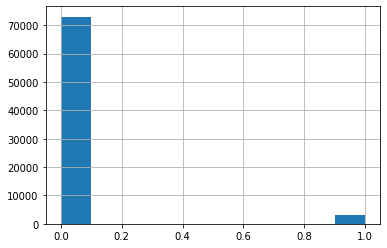

In [15]:
Y_train.hist()

In [16]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(Xscaled, Y_train)

In [17]:
X.shape, y.shape

((146024, 369), (146024,))

<AxesSubplot:>

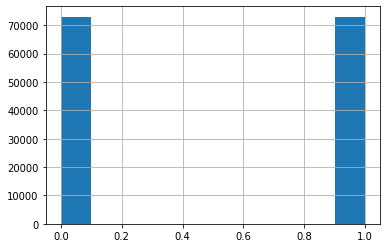

In [18]:
y.hist()

In [19]:
y.value_counts()

0    73012
1    73012
Name: TARGET, dtype: int64

# MODEL

In [20]:
XGB_clf = XGBClassifier(random_state=2021) #eval_metric='mlogloss'

In [21]:
XGB_clf.fit(X, y)

[20:28:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [22]:
y_pred = XGB_clf.predict(testscaled)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [24]:
samp_sub.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


# Creating Submission File

In [25]:
submit = pd.DataFrame({ "ID": samp_sub.ID, "TARGET": y_pred})

In [26]:
submit.shape

(75818, 2)

In [27]:
submit.to_csv("XGBoost_Classifier_SMOTE.csv", index=False)